<a href="https://colab.research.google.com/github/manjulsolanke/python-learnig/blob/main/Soil_image_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import numpy as np
import pandas as pd

import os
dir_black = os.path.join('/gdrive/MyDrive/soli_type/Soil types/Black Soil')
dir_Cinder = os.path.join('/gdrive/MyDrive/soli_type/Soil types/Cinder Soil')
dir_Laterite = os.path.join('/gdrive/MyDrive/soli_type/Soil types/Laterite Soil')
dir_peat = os.path.join('/gdrive/MyDrive/soli_type/Soil types/Peat Soil')
dir_yellow = os.path.join('/gdrive/MyDrive/soli_type/Soil types/Yellow Soil')


In [3]:
import tensorflow as tf
from tensorflow import keras

In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [4]:
image_size = 220
batch_size = 10


target_size = (image_size, image_size)
input_shape = (image_size, image_size, 3)

In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)


train_generator = train_datagen.flow_from_directory(
        '/gdrive/MyDrive/soli_type/Soil types/',
        target_size=(200, 200),
        batch_size = batch_size,
        classes = [ 'Black Soil','Cinder Soil', 'Laterite Soil','Peat Soil','Yellow Soil'],
       class_mode='categorical')

Found 156 images belonging to 5 classes.


In [6]:
for image_batch, label_batch in train_generator:
  break
  image_batch.shape, label_batch.shape

In [7]:
print (train_generator.class_indices)

{'Black Soil': 0, 'Cinder Soil': 1, 'Laterite Soil': 2, 'Peat Soil': 3, 'Yellow Soil': 4}


In [8]:
model = tf.keras.models.Sequential([

    # The first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(220, 220, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),

    # Flatten the results to feed into a dense layer
    tf.keras.layers.Flatten(),
    # 128 neuron in the fully-connected layer
    tf.keras.layers.Dense(128, activation='relu'),
    # 5 output neurons for 5 classes with the softmax activation
    tf.keras.layers.Dense(5, activation='softmax')
])

In [9]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 218, 218, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2  (None, 109, 109, 16)      0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 107, 107, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 53, 53, 32)        0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 51, 51, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPoolin  (None, 25, 25, 64)        0

In [10]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
              optimizer=RMSprop(learning_rate=0.001),
              metrics=['acc'])

In [11]:
total_sample = train_generator.n
n_epochs = 30

In [12]:
history = model.fit(
        train_generator,
        steps_per_epoch = int(total_sample/batch_size),
        epochs = n_epochs,
        verbose = 2)

Epoch 1/30
15/15 - 37s - loss: 1.6495 - acc: 0.2192 - 37s/epoch - 2s/step
Epoch 2/30
15/15 - 5s - loss: 1.5957 - acc: 0.3151 - 5s/epoch - 356ms/step
Epoch 3/30
15/15 - 7s - loss: 1.2215 - acc: 0.4452 - 7s/epoch - 475ms/step
Epoch 4/30
15/15 - 6s - loss: 1.1897 - acc: 0.4110 - 6s/epoch - 407ms/step
Epoch 5/30
15/15 - 6s - loss: 1.0849 - acc: 0.4452 - 6s/epoch - 419ms/step
Epoch 6/30
15/15 - 7s - loss: 0.9700 - acc: 0.5342 - 7s/epoch - 494ms/step
Epoch 7/30
15/15 - 6s - loss: 0.9180 - acc: 0.5548 - 6s/epoch - 403ms/step
Epoch 8/30
15/15 - 8s - loss: 0.9407 - acc: 0.5548 - 8s/epoch - 525ms/step
Epoch 9/30
15/15 - 6s - loss: 0.9135 - acc: 0.5753 - 6s/epoch - 374ms/step
Epoch 10/30
15/15 - 5s - loss: 0.8523 - acc: 0.5959 - 5s/epoch - 362ms/step
Epoch 11/30
15/15 - 8s - loss: 0.7793 - acc: 0.6575 - 8s/epoch - 540ms/step
Epoch 12/30
15/15 - 5s - loss: 0.8197 - acc: 0.6027 - 5s/epoch - 355ms/step
Epoch 13/30
15/15 - 7s - loss: 0.8007 - acc: 0.6096 - 7s/epoch - 477ms/step
Epoch 14/30
15/15 - 5s

In [13]:
history = model.fit(
        train_generator,
        steps_per_epoch = int(total_sample/batch_size),
        epochs = n_epochs,
        verbose = 2)

Epoch 1/30
15/15 - 6s - loss: 0.4866 - acc: 0.8425 - 6s/epoch - 368ms/step
Epoch 2/30
15/15 - 9s - loss: 0.3175 - acc: 0.9178 - 9s/epoch - 623ms/step
Epoch 3/30
15/15 - 5s - loss: 0.2622 - acc: 0.9178 - 5s/epoch - 356ms/step
Epoch 4/30
15/15 - 7s - loss: 0.4474 - acc: 0.8356 - 7s/epoch - 470ms/step
Epoch 5/30
15/15 - 6s - loss: 0.4359 - acc: 0.8562 - 6s/epoch - 405ms/step
Epoch 6/30
15/15 - 5s - loss: 0.2778 - acc: 0.9315 - 5s/epoch - 355ms/step
Epoch 7/30
15/15 - 8s - loss: 0.2413 - acc: 0.9267 - 8s/epoch - 521ms/step
Epoch 8/30
15/15 - 5s - loss: 0.4540 - acc: 0.8836 - 5s/epoch - 364ms/step
Epoch 9/30
15/15 - 9s - loss: 0.2871 - acc: 0.8836 - 9s/epoch - 599ms/step
Epoch 10/30
15/15 - 5s - loss: 0.2632 - acc: 0.9041 - 5s/epoch - 364ms/step
Epoch 11/30
15/15 - 7s - loss: 0.2050 - acc: 0.9178 - 7s/epoch - 476ms/step
Epoch 12/30
15/15 - 5s - loss: 0.4902 - acc: 0.8356 - 5s/epoch - 362ms/step
Epoch 13/30
15/15 - 8s - loss: 0.1789 - acc: 0.9247 - 8s/epoch - 556ms/step
Epoch 14/30
15/15 - 5

In [14]:
import matplotlib.pyplot as plt

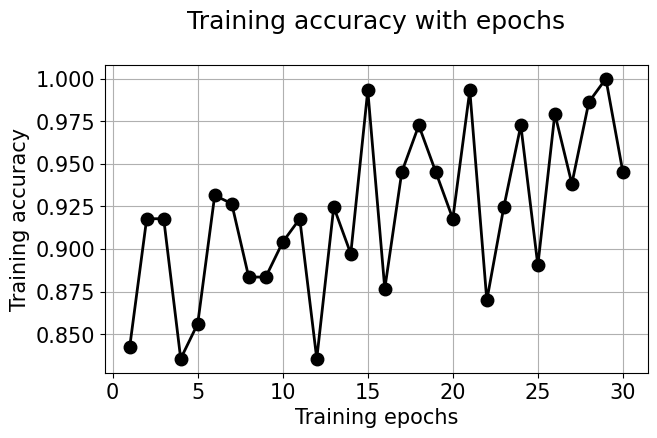

In [15]:
plt.figure(figsize=(7,4))
plt.plot([i+1 for i in range(n_epochs)],history.history['acc'],'-o',c='k',lw=2,markersize=9)
plt.grid(True)
plt.title("Training accuracy with epochs\n",fontsize=18)
plt.xlabel("Training epochs",fontsize=15)
plt.ylabel("Training accuracy",fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()


In [16]:
model.save('my_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(
